## Arbitrary Imputation ==> Feature-Engine


Feature-engine is an open source Python package originally designed to support this course, but has increasingly gained popularity and now supports transformations beyond those taught in the course. It was launched in 2017, and since then, several releases have appeared and a growing international community is beginning to lead the development.

- Feature-engine works like to Scikit-learn, so it is easy to learn
- Feature-engine allows you to implement specific engineering steps to specific feature subsets
- Feature-engine can be integrated with the Scikit-learn pipeline allowing for smooth model building
- 
**Feature-Engine allows you to design and store a feature engineering pipeline with different procedures for different variable groups.**

- Make sure you have installed feature-engine before running this notebook.

## In this demo

We will use Feature-engine to perform arbitrary value imputation using the Ames House Price Dataset.

- To download the dataset visit the lecture **Datasets** in **Section 1** of the course.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# from feature-engine
from feature_engine.imputation import ArbitraryNumberImputer

In [2]:
# let's load the dataset with a selected group of variables

cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [3]:
data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

All the predictor variables contain missing data.

In [4]:
# let's separate into training and testing set

# first drop the target from the feature list
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(
    data[cols_to_use],
    data['SalePrice'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((1022, 5), (438, 5))

### Feature-engine captures the numerical variables automatically

In [5]:
# we call the imputer from Feature-engine
# pecifying the arbitrary value

imputer = ArbitraryNumberImputer(arbitrary_number = -999)

In [6]:
# we fit the imputer

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-999)

In [7]:
# we see that the imputer found the numerical variables

imputer.variables_

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [8]:
# here we can see the arbitrary value

imputer.arbitrary_number

-999

In [9]:
# Feature-engine returns a dataframe

tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,NaN,-999.0,573.0,1998.0
682,Gd,Gd,-999.0,0.0,1996.0
960,TA,NaN,50.0,0.0,-999.0
1384,TA,NaN,60.0,0.0,1939.0
1100,TA,NaN,60.0,0.0,1930.0


In [10]:
# let's check that the numerical variables don't
# contain NA any more

tmp[imputer.variables_].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

## Feature-engine allows you to specify variable groups

In [11]:
# let's do it imputation but this time
# and let's do it over 2 of the 3 numerical variables

imputer = ArbitraryNumberImputer(arbitrary_number=-999,
                                 variables=['LotFrontage', 'MasVnrArea'])

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-999,
                       variables=['LotFrontage', 'MasVnrArea'])

In [12]:
# now the imputer uses only the variables we indicated

imputer.variables_

['LotFrontage', 'MasVnrArea']

In [13]:
# and we can see the value assigned to each variable
imputer.arbitrary_number

-999

In [14]:
# Feature-engine returns a dataframe

tmp = imputer.transform(X_train)

# let's check null values are gone
tmp[imputer.variables_].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
dtype: float64

## We can impute different variables with different numbers

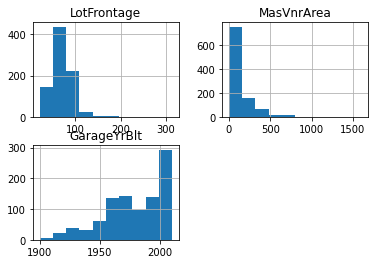

In [15]:
# let's look at the distributions to determine the
# arbitraty values to use

X_train.hist()
plt.show()

In [16]:
imputer = ArbitraryNumberImputer(
    imputer_dict={'LotFrontage': -999, 'MasVnrArea': -999, 'GarageYrBlt': -1})

imputer.fit(X_train)

ArbitraryNumberImputer(imputer_dict={'GarageYrBlt': -1, 'LotFrontage': -999,
                                     'MasVnrArea': -999})

In [17]:
# now the imputer uses only the variables we indicated

imputer.variables_

dict_keys(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [18]:
imputer.imputer_dict_

{'LotFrontage': -999, 'MasVnrArea': -999, 'GarageYrBlt': -1}

In [19]:
# Feature-engine returns a dataframe

tmp = imputer.transform(X_train)

# let's check null values are gone
tmp[imputer.variables_].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

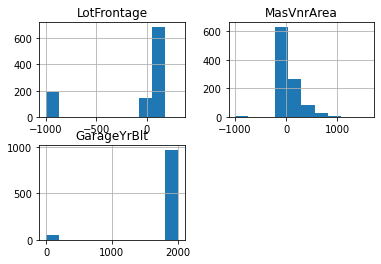

In [20]:
# let's check the histograms of the variables
# after the imputation

tmp[imputer.variables_].hist()
plt.show()